## **Project: Predicting Fuel Economy**

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('auto-mpg.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
df['origin'] = df.origin.astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [14]:
df.describe(include='number')

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

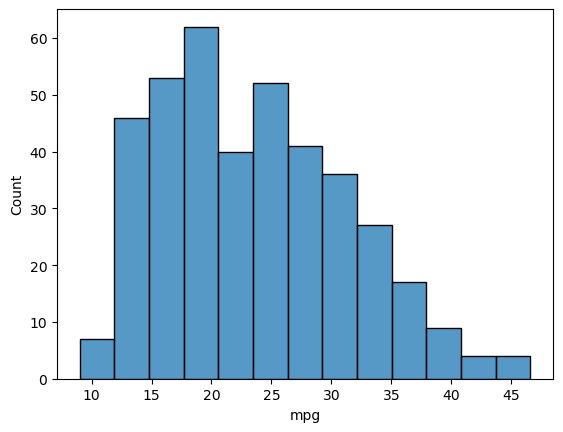

In [19]:
sns.histplot(df.mpg);

In [30]:
## Determine correlation between target column and other feature columns
corr_mat = df.corr(numeric_only=True)[['mpg']].drop('mpg',axis=0)

,mpg
cylinders,-0.775396
displacement,-0.804203
weight,-0.831741
acceleration,0.420289
model year,0.579267


<Axes: >

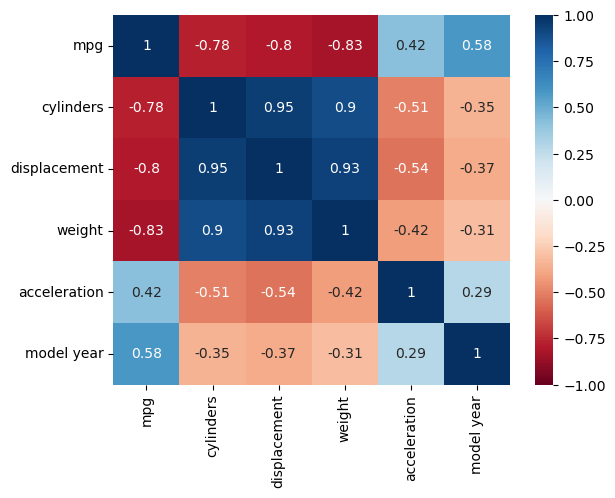

In [33]:
sns.heatmap(
    corr_mat,
    annot=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1
)

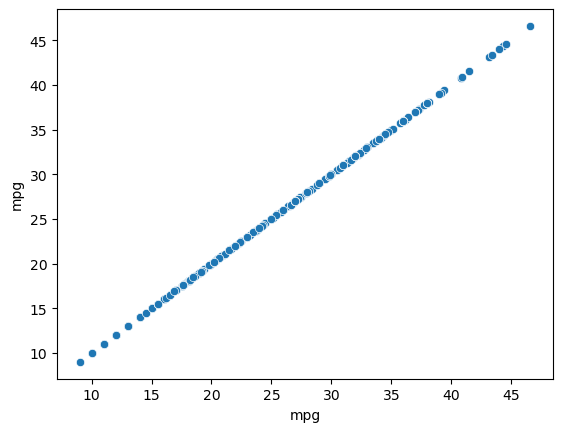

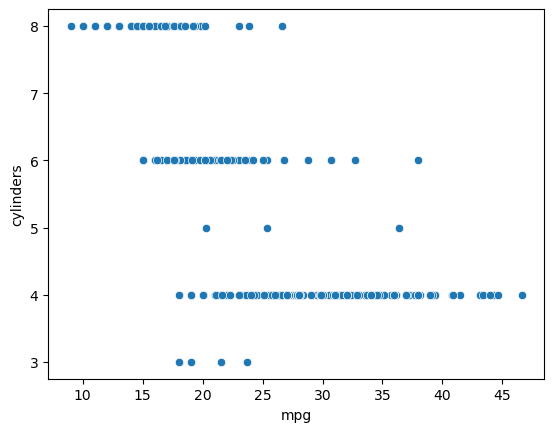

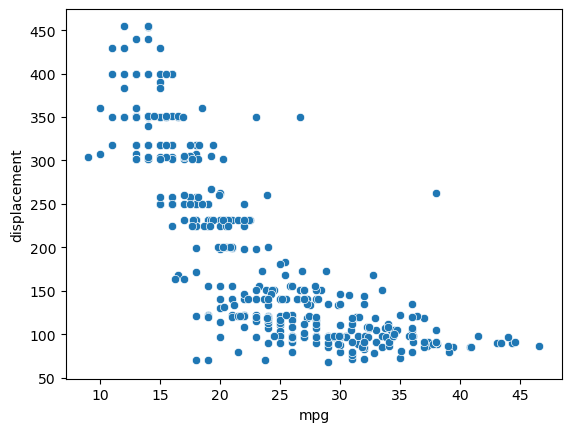

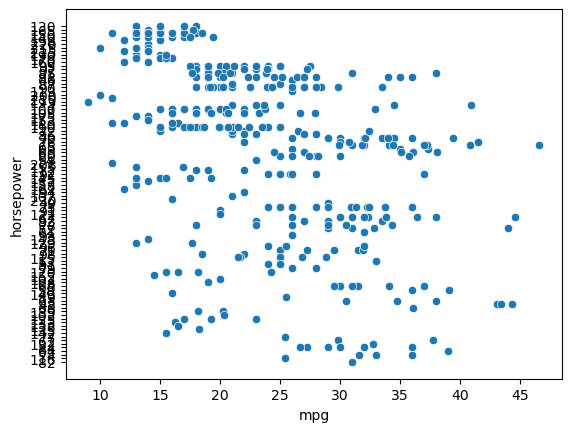

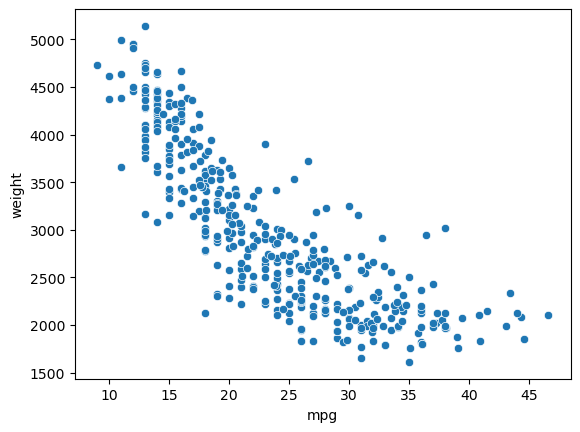

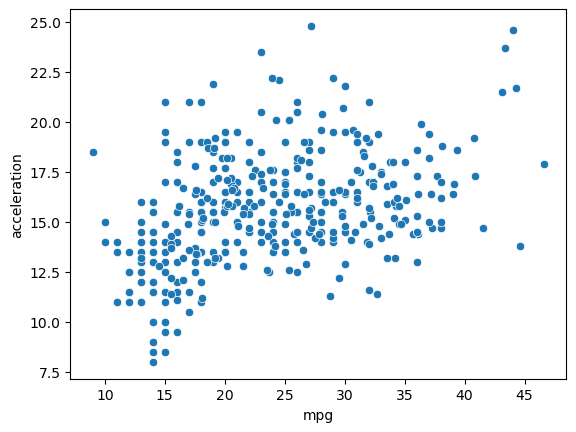

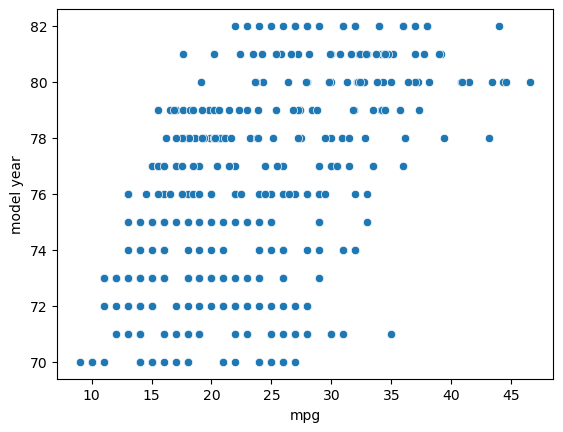

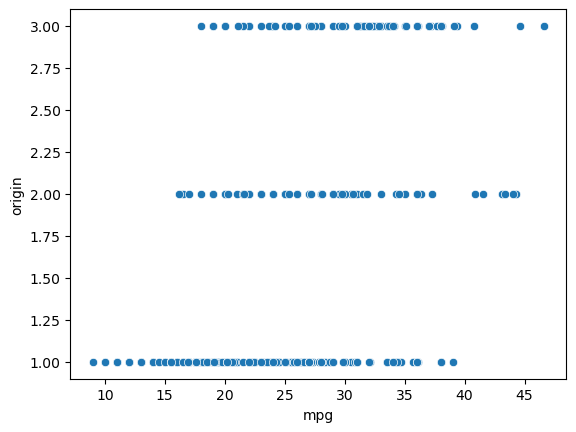

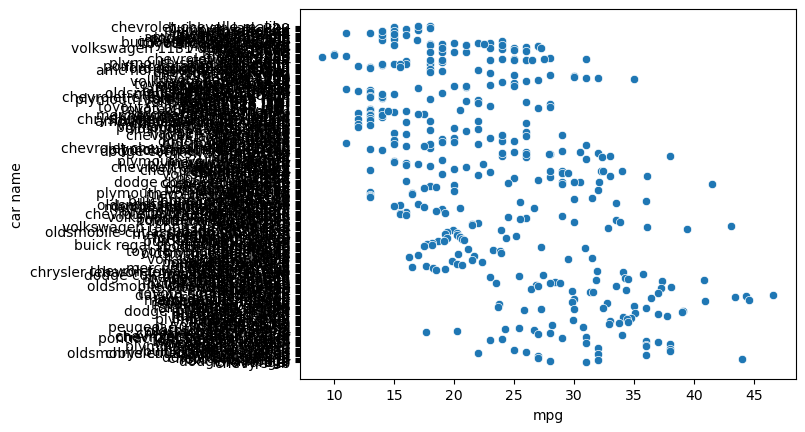

In [37]:
cols = df.columns

for col in cols:
    sns.scatterplot(
        df,
        x=df.mpg,
        y=col
    )
    plt.show();

In [76]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

In [78]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [80]:
df['horsepower'].describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

### **Feature Engineering**

In [121]:
df_model = df.assign(
    weight2 = df['weight'] **2
)
df_model = pd.get_dummies(df_model.drop('car name',axis=1),drop_first=True,dtype=int)

In [122]:
df_model

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,7784100,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,4536900,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,5267025,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,6890625,0,0


### **Split the data into train-test datasets**

In [102]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

In [131]:
features =[
    'weight',
    'weight2',
    # 'cylinders',
    # 'displacement',
    # 'horsepower',
    # 'acceleration',
    'model year',
    'origin_2',
    'origin_3'
]
target = 'mpg'

In [132]:
X = sm.add_constant(df_model[features])
y = df[target]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
                            X,y,test_size=0.2, random_state=42)

### **Fit a linear regression model with KFold cross-validation**

In [134]:
def cross_val(X, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # Create a list to store validation scores for each fold

    cv_lm_tr_r2s = []
    cv_lm_tr_mae = []
    cv_lm_val_r2s = []
    cv_lm_val_mae = []
    
    for train_ind, val_ind in kf.split(X, y):
        # Subset data based on CV folds
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
        # Fit the Model on fold's training data
        model = sm.OLS(y_train, X_train).fit()
        # Append Validation score to list 
        cv_lm_tr_r2s.append(r2(y_train, model.predict(X_train)))
        cv_lm_tr_mae.append(mae(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2(y_val, model.predict(X_val),))
        cv_lm_val_mae.append(mae(y_val, model.predict(X_val),))
        
        
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")
    
    print(f"Training MAEs: {[round(x, 3) for x in cv_lm_tr_mae]}")
    print(f"Training MAEs: {round(np.mean(cv_lm_tr_mae), 3)} +- {round(np.std(cv_lm_tr_mae), 3)}")    
        
    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_val_mae]}")
    print(f"Cross Val MAEs: {round(np.mean(cv_lm_val_mae), 3)} +- {round(np.std(cv_lm_val_mae), 3)}")
    
    return model

In [135]:
model = cross_val(X_train, y_train, 5)

All Training R2s: [0.85, 0.857, 0.849, 0.853, 0.84]
Training R2s: 0.85 +- 0.005
Training MAEs: [2.254, 2.252, 2.325, 2.287, 2.281]
Training MAEs: 2.28 +- 0.027
All Validation R2s: [0.845, 0.817, 0.848, 0.824, 0.87]
Cross Val R2s: 0.841 +- 0.019
All Validation MAEs: [2.518, 2.437, 2.067, 2.264, 2.367]
Cross Val MAEs: 2.331 +- 0.156


In [136]:
### Residual plotter helper function

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
    
def residual_analysis_plots(model):
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0], alpha=.3)
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

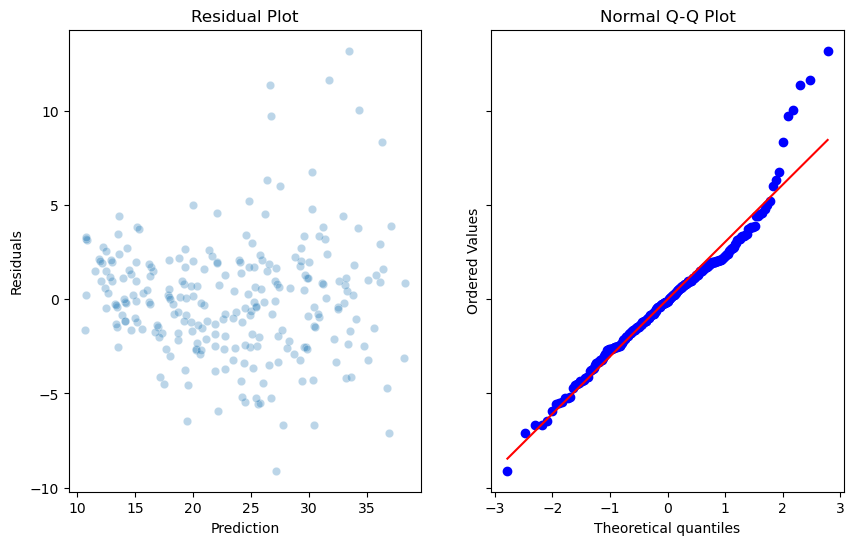

In [137]:
residual_analysis_plots(model)

In [138]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     262.2
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           4.92e-97
Time:                        13:02:09   Log-Likelihood:                -649.28
No. Observations:                 255   AIC:                             1311.
Df Residuals:                     249   BIC:                             1332.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5877      5.240     -1.257      0.210     -16.908       3.732
weight        -0.0191      0.002     -9.850      0.000      -0.023      -0.015
weight2     2.064e-06   2.95e-07      6.991      0.000    1.48e-06    2.64e-06
model year     0.8803      0.059     15.037      0.000       0.765       0.996
origin_2       1.3687      0.617      2.219      0.027       0.154       2.584
origin_3       0.7867      0.637      1.236      0.218      -0.467       2.041
==============================================================================
Omnibus:                       39.283   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.514
Skew:                           0.725   Prob(JB):                     8.15e-21
Kurtosis:                       5.570   Cond. No.                     2.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
## Fit the final model
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     351.9
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          6.59e-126
Time:                        13:05:34   Log-Likelihood:                -808.23
No. Observations:                 318   AIC:                             1628.
Df Residuals:                     312   BIC:                             1651.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6685      4.634     -1.008      0.314     -13.786       4.449
weight        -0.0205      0.002    -11.815      0.000      -0.024      -0.017
weight2     2.246e-06   2.65e-07      8.475      0.000    1.72e-06    2.77e-06
model year     0.8840      0.052     17.010      0.000       0.782       0.986
origin_2       1.6226      0.537      3.022      0.003       0.566       2.679
origin_3       0.8627      0.550      1.570      0.118      -0.219       1.944
==============================================================================
Omnibus:                       39.109   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.779
Skew:                           0.652   Prob(JB):                     2.88e-18
Kurtosis:                       5.097   Cond. No.                     2.91e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
r2(y_test,model.predict(X_test))

0.878065889549524

In [145]:
mae(y_test,model.predict(X_test))

1.8982490796511287